# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [9]:
import pandas as pd

In [10]:
pip install xlrd

     ---------------------------------- 96.5/96.5 KB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Family\scoop\apps\pyenv\current\pyenv-win\versions\3.10.3\python.exe -m pip install --upgrade pip' command.


## 1. Read in the file using pandas, and look at the first five rows

* *Tip: You will probably need to pip install something to make this Excel file work!*

In [15]:
df = pd.read_excel("KyotoFullFlower7.xls")
df.head(5)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add **a parameter to make sure your columns look right**. How can you tell pandas to skip rows?

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [23]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 3. Look at the final five rows of the data

In [24]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df.tail(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some NaN values

It looks like you should have NaN/missing values in the beginning of the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

* *Tip: it's another open with reading in the file!*

In [25]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25, na_values="-")
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


In [51]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('-', '_') for c in df.columns]
df.columns = [c.replace('(','') for c in df.columns]
df.columns = [c.replace(')','') for c in df.columns]
df.head()

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU


## 5. What reference is the most commonly used when figuring out cherry blossom flowering dates?

If the first result is `"-"`, you need to redo the last question.

In [29]:
df.Reference_Name.value_counts()

NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
OYUDONONO-UENO-NIKKI [EDA]    21
                              ..
GONARAIN-GYOSEI-BASSHO         1
MORIMITSU-KOKI                 1
SANKAIKI                       1
TSUKIMOUDE-WAKASHU(PART-3)     1
NEWS-PAPET(DAIGO-JI)           1
Name: Reference_Name, Length: 222, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

In [40]:
df = df.dropna(subset=['Full-flowering_date_(DOY)'])
df

,AD,Full-flowering_date_(DOY),Full-flowering_date,Source_code,Data_type_code,Reference_Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 6.5 Confirm you now have 827 rows

In [36]:
df.shape

(825, 6)

## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

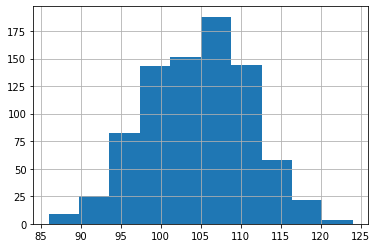

In [52]:
df.Full_flowering_date__DOY.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

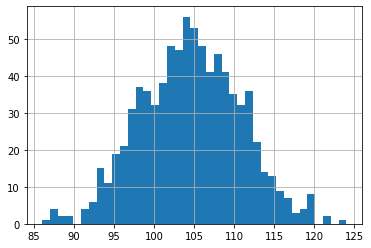

In [54]:
df.Full_flowering_date__DOY.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [56]:
df.Full_flowering_date__DOY.describe().round(1)

count    825.0
mean     104.6
std        6.4
min       86.0
25%      100.0
50%      105.0
75%      109.0
max      124.0
Name: Full_flowering_date__DOY, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [59]:
df[df.AD < 1900].Full_flowering_date__DOY.mean().round()

105.0

## 11. How about after 1900?

In [61]:
df[df.AD > 1900].Full_flowering_date__DOY.mean().round()

100.0

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [68]:
df.Source_code.value_counts()

3.0    342
4.0    250
1.0    105
5.0     59
7.0     40
2.0     15
6.0      9
8.0      5
Name: Source_code, dtype: int64

In [ ]:
# 250 times

## 13. Display the rows where our data was from a title in Japanese poetry

In [73]:
df.dtypes

AD                            int64
Full_flowering_date__DOY    float64
Full_flowering_date         float64
Source_code                 float64
Data_type_code              float64
Reference_Name               object
dtype: object

In [74]:
df[df.Source_code == 4.0]

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
149,950,95.0,405.0,4.0,2.0,DAINIHON-SHIRYO
178,979,104.0,414.0,4.0,3.0,DAINIHON-SHIRYO
184,985,94.0,404.0,4.0,2.0,SHOYUKI
188,989,100.0,410.0,4.0,2.0,SHOYUKI
218,1019,98.0,408.0,4.0,2.0,SHOYUKI
...,...,...,...,...,...,...
1200,2001,96.0,406.0,4.0,0.0,NEWS-PAPER(ARASHIYAMA)
1201,2002,91.0,401.0,4.0,0.0,NEWS-PAPER(ARASHIYAMA)
1202,2003,98.0,408.0,4.0,0.0,NEWS-PAPER(ARASHIYAMA)
1203,2004,92.0,401.0,4.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:>

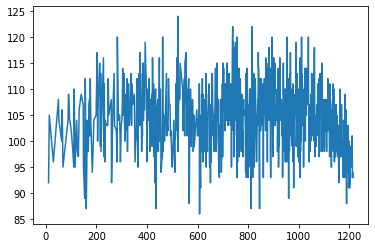

In [75]:
df.Full_flowering_date__DOY.plot()

<AxesSubplot:xlabel='AD'>

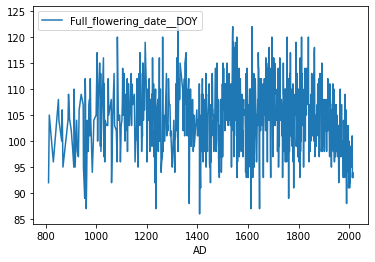

In [76]:
df.plot(x='AD', y='Full_flowering_date__DOY')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [78]:
df.rolling(10, on='AD', min_periods=5)['Full_flowering_date__DOY'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full_flowering_date__DOY, dtype: float64

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

In [91]:
df['rolling_date'] = df.rolling(10, on='AD', min_periods=5)['Full_flowering_date__DOY'].mean().tail()
df.tail(100)

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date
1112,1913,103.0,413.0,4.0,0.0,SEIBU-TETSUDO-KANRIKYOKU ADV(ARASHIYAMA),NaN
1113,1914,102.0,412.0,4.0,0.0,KOBE-TETSUDO-KANRIKYOKU ADV(ARASHIYAMA),NaN
1114,1915,102.0,412.0,4.0,0.0,NEWS-PAPER(ARASHIYAMA),NaN
1115,1916,112.0,421.0,4.0,0.0,SEIBU-TETSUDO-KANRIKYOKU ADV(ARASHIYAMA),NaN
1116,1917,103.0,413.0,4.0,0.0,NEWS-PAPER(ARASHIYAMA),NaN
...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),95.9
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.9
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.4
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.6


<AxesSubplot:xlabel='AD'>

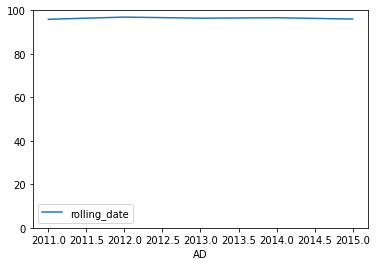

In [90]:
df.plot(x='AD', y='rolling_date', ylim=(0,100))

## 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [143]:
df.loc[df['Full_flowering_date'] < 600, 'month'] = 'May'
df.loc[df['Full_flowering_date'] < 500, 'month'] = 'April'
df.loc[df['Full_flowering_date'] < 400, 'month'] = 'March'

df

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date,month,day_of_month,day_of_month1,month2
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,NaT,1900-04-01,NaT
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,NaT,1900-04-15,NaT
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,NaT,1900-04-06,NaT
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,NaT,1900-04-18,NaT
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,NaT,1900-04-14,NaT
...,...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),95.9,April,NaT,1900-04-09,NaT
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.9,April,NaT,1900-04-10,NaT
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.4,April,NaT,1900-04-03,NaT
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.6,April,NaT,1900-04-04,NaT


## 17. Using your new column, how many blossomings happened in each month?

In [144]:
df.month.value_counts()

April    813
March      9
May        3
Name: month, dtype: int64

## 18. Make a bar graph of how many blossomings happened in each month.

<AxesSubplot:>

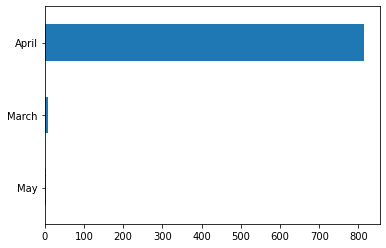

In [145]:
df.month.value_counts().sort_values(ascending=True).plot(kind='barh')

## 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.`

*Tip: If you didn't drop the rows missing full-flowering dates earlier, it will yell at you about missing data. Go back up and fix Number 6!*

In [164]:
df['day_of_month'] = pd.to_datetime(df.Full_flowering_date, format='%m%d', errors='coerce').dt.day
df.tail(5)

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date,month,day_of_month,day_of_month1,month2
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),95.9,April,9,1900-04-09,NaT
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.9,April,10,1900-04-10,NaT
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.4,April,3,1900-04-03,NaT
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.6,April,4,1900-04-04,NaT
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.0,April,3,1900-04-03,NaT


,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date,month,day_of_month,day_of_month1,month2
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-01,1900-04-01,NaT
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-15,1900-04-15,NaT
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-06,1900-04-06,NaT
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,1900-04-18,1900-04-18,NaT
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,1900-04-14,1900-04-14,NaT
...,...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),95.9,April,1900-04-09,1900-04-09,NaT
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.9,April,1900-04-10,1900-04-10,NaT
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.4,April,1900-04-03,1900-04-03,NaT
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.6,April,1900-04-04,1900-04-04,NaT


In [172]:
df.drop("day_of_month1", axis='columns', inplace=True)
df.tail(5)

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date,month,day_of_month
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),95.9,April,9
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.9,April,10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.4,April,3
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.6,April,4
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.0,April,3


## 20. Adding a date column

If you don't have a nice-looking date column yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. By "nice looking," I mean it should say something like `April 11`.

* Instead of using the two existing columns, you could learn to use `.dt.strftime` as mentioned above.

In [ ]:
df.column_name = df.column_name.astype(str)

In [176]:
df.day_of_month = df.day_of_month.astype(str)
df

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date,month,day_of_month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,14
...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),95.9,April,9
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.9,April,10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.4,April,3
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.6,April,4


In [184]:
df.AD = df.AD.astype(str)
df

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date,month,day_of_month,Full_Flowering
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,1,April 1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,15,April 15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,6,April 6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,18,April 18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,14,April 14
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),95.9,April,9,April 9
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.9,April,10,April 10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.4,April,3,April 3
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.6,April,4,April 4


In [185]:
df['Full_Flowering'] = df['month'] + " " + df['day_of_month'] + " " + df['AD']
df

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date,month,day_of_month,Full_Flowering
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,1,April 1 812
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,15,April 15 815
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,6,April 6 831
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,18,April 18 851
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,14,April 14 853
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),95.9,April,9,April 9 2011
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.9,April,10,April 10 2012
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.4,April,3,April 3 2013
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.6,April,4,April 4 2014


## 21. What day of the week do cherry blossoms like to blossom on?

Do they get the weekends off?

In [203]:
df.dtypes

AD                                  object
Full_flowering_date__DOY           float64
Full_flowering_date                float64
Source_code                        float64
Data_type_code                     float64
Reference_Name                      object
rolling_date                       float64
month                               object
day_of_month                        object
Full_Flowering              datetime64[ns]
dtype: object

In [202]:
df['Full_Flowering']= pd.to_datetime(df['Full_Flowering'], errors = 'coerce')
df

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date,month,day_of_month,Full_Flowering
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,1,NaT
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,15,NaT
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,6,NaT
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,18,NaT
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,14,NaT
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),95.9,April,9,2011-04-09
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.9,April,10,2012-04-10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.4,April,3,2013-04-03
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.6,April,4,2014-04-04


In [195]:
df.dtypes

AD                                  object
Full_flowering_date__DOY           float64
Full_flowering_date                float64
Source_code                        float64
Data_type_code                     float64
Reference_Name                      object
rolling_date                       float64
month                               object
day_of_month                        object
Full_Flowering              datetime64[ns]
dtype: object

In [205]:
df['day_of_week'] = pd.to_datetime(df.Full_Flowering).dt.dayofweek
df

,AD,Full_flowering_date__DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date,month,day_of_month,Full_Flowering,day_of_week
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,1,NaT,NaN
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,15,NaT,NaN
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,6,NaT,NaN
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,18,NaT,NaN
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,14,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),95.9,April,9,2011-04-09,5.0
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.9,April,10,2012-04-10,1.0
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.4,April,3,2013-04-03,2.0
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.6,April,4,2014-04-04,4.0


In [211]:
df.day_of_week.value_counts().sort_index(ascending=True)

#The day of the week with Monday=0, Sunday=6.

0.0    35
1.0    44
2.0    40
3.0    50
4.0    56
5.0    46
6.0    58
Name: day_of_week, dtype: int64

<AxesSubplot:>

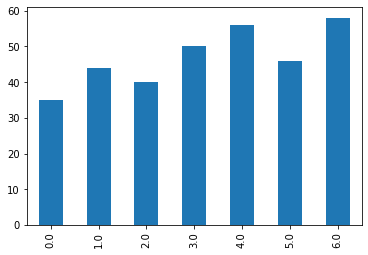

In [214]:
df.day_of_week.value_counts().sort_index(ascending=True).plot(kind='bar')

# YOU ARE DONE.

And **incredible.**

In [ ]:
# Wahoo!